In [586]:
using CairoMakie
using Colors
using CSV
using DataFrames
using DelimitedFiles
using Statistics # to call cor.
using Random
using LaTeXStrings
using Printf
using Makie.FileIO
CairoMakie.activate!() # hide
using GeometryBasics  # Import for Point2f0 and Circle
include("../src/figure.jl");

In [593]:
color_gray_blue_set = repeat([RGBA(0.5, 0.5, 0.5, 0.6), RGBA(0.2, 0.4, 0.8, 0.6)], 3) ;# gray vs blue
yellow_colormap = [RGBA(1, 1, 0, 0.0), RGBA(1, 1, 0, 1.0)]  # Transparent => 0.5, Non-transparent =>1.0
blue_colormap = [RGBA(0, 0, 1, 0.0), RGBA(0, 0, 1, 1.0)]  # Transparent => 0.5, Non-transparent =>1.0
black_colormap = [RGBA(0, 0, 0, 0.0), RGBA(0, 0, 0, 1.0)]  # Transparent => 0.5, Non-transparent =>1.0
gray_colormap = [RGBA(0.5, 0.5, 0.5, 0.0), RGBA(0.5, 0.5, 0.5, 1.0)]  # Transparent => 0.5, Non-transparent =>1.0
orange_colormap = RGBA(0.9, 0.5, 0.2, 0.6) # Past method
darkviolet_to_pink = cgrad([
    RGBA(0.2, 0, 0.5, 1.0),  # Dark violet for smallest values
    RGBA(0.6, 0, 0.8, 1.0),  # Purple
    RGBA(1, 0.4, 0.7, 1.0)   # Pink for highest values
], categorical = false);

# Set font and figure size. 
FS_L = 26;

# Figures in Main

## Fig.1

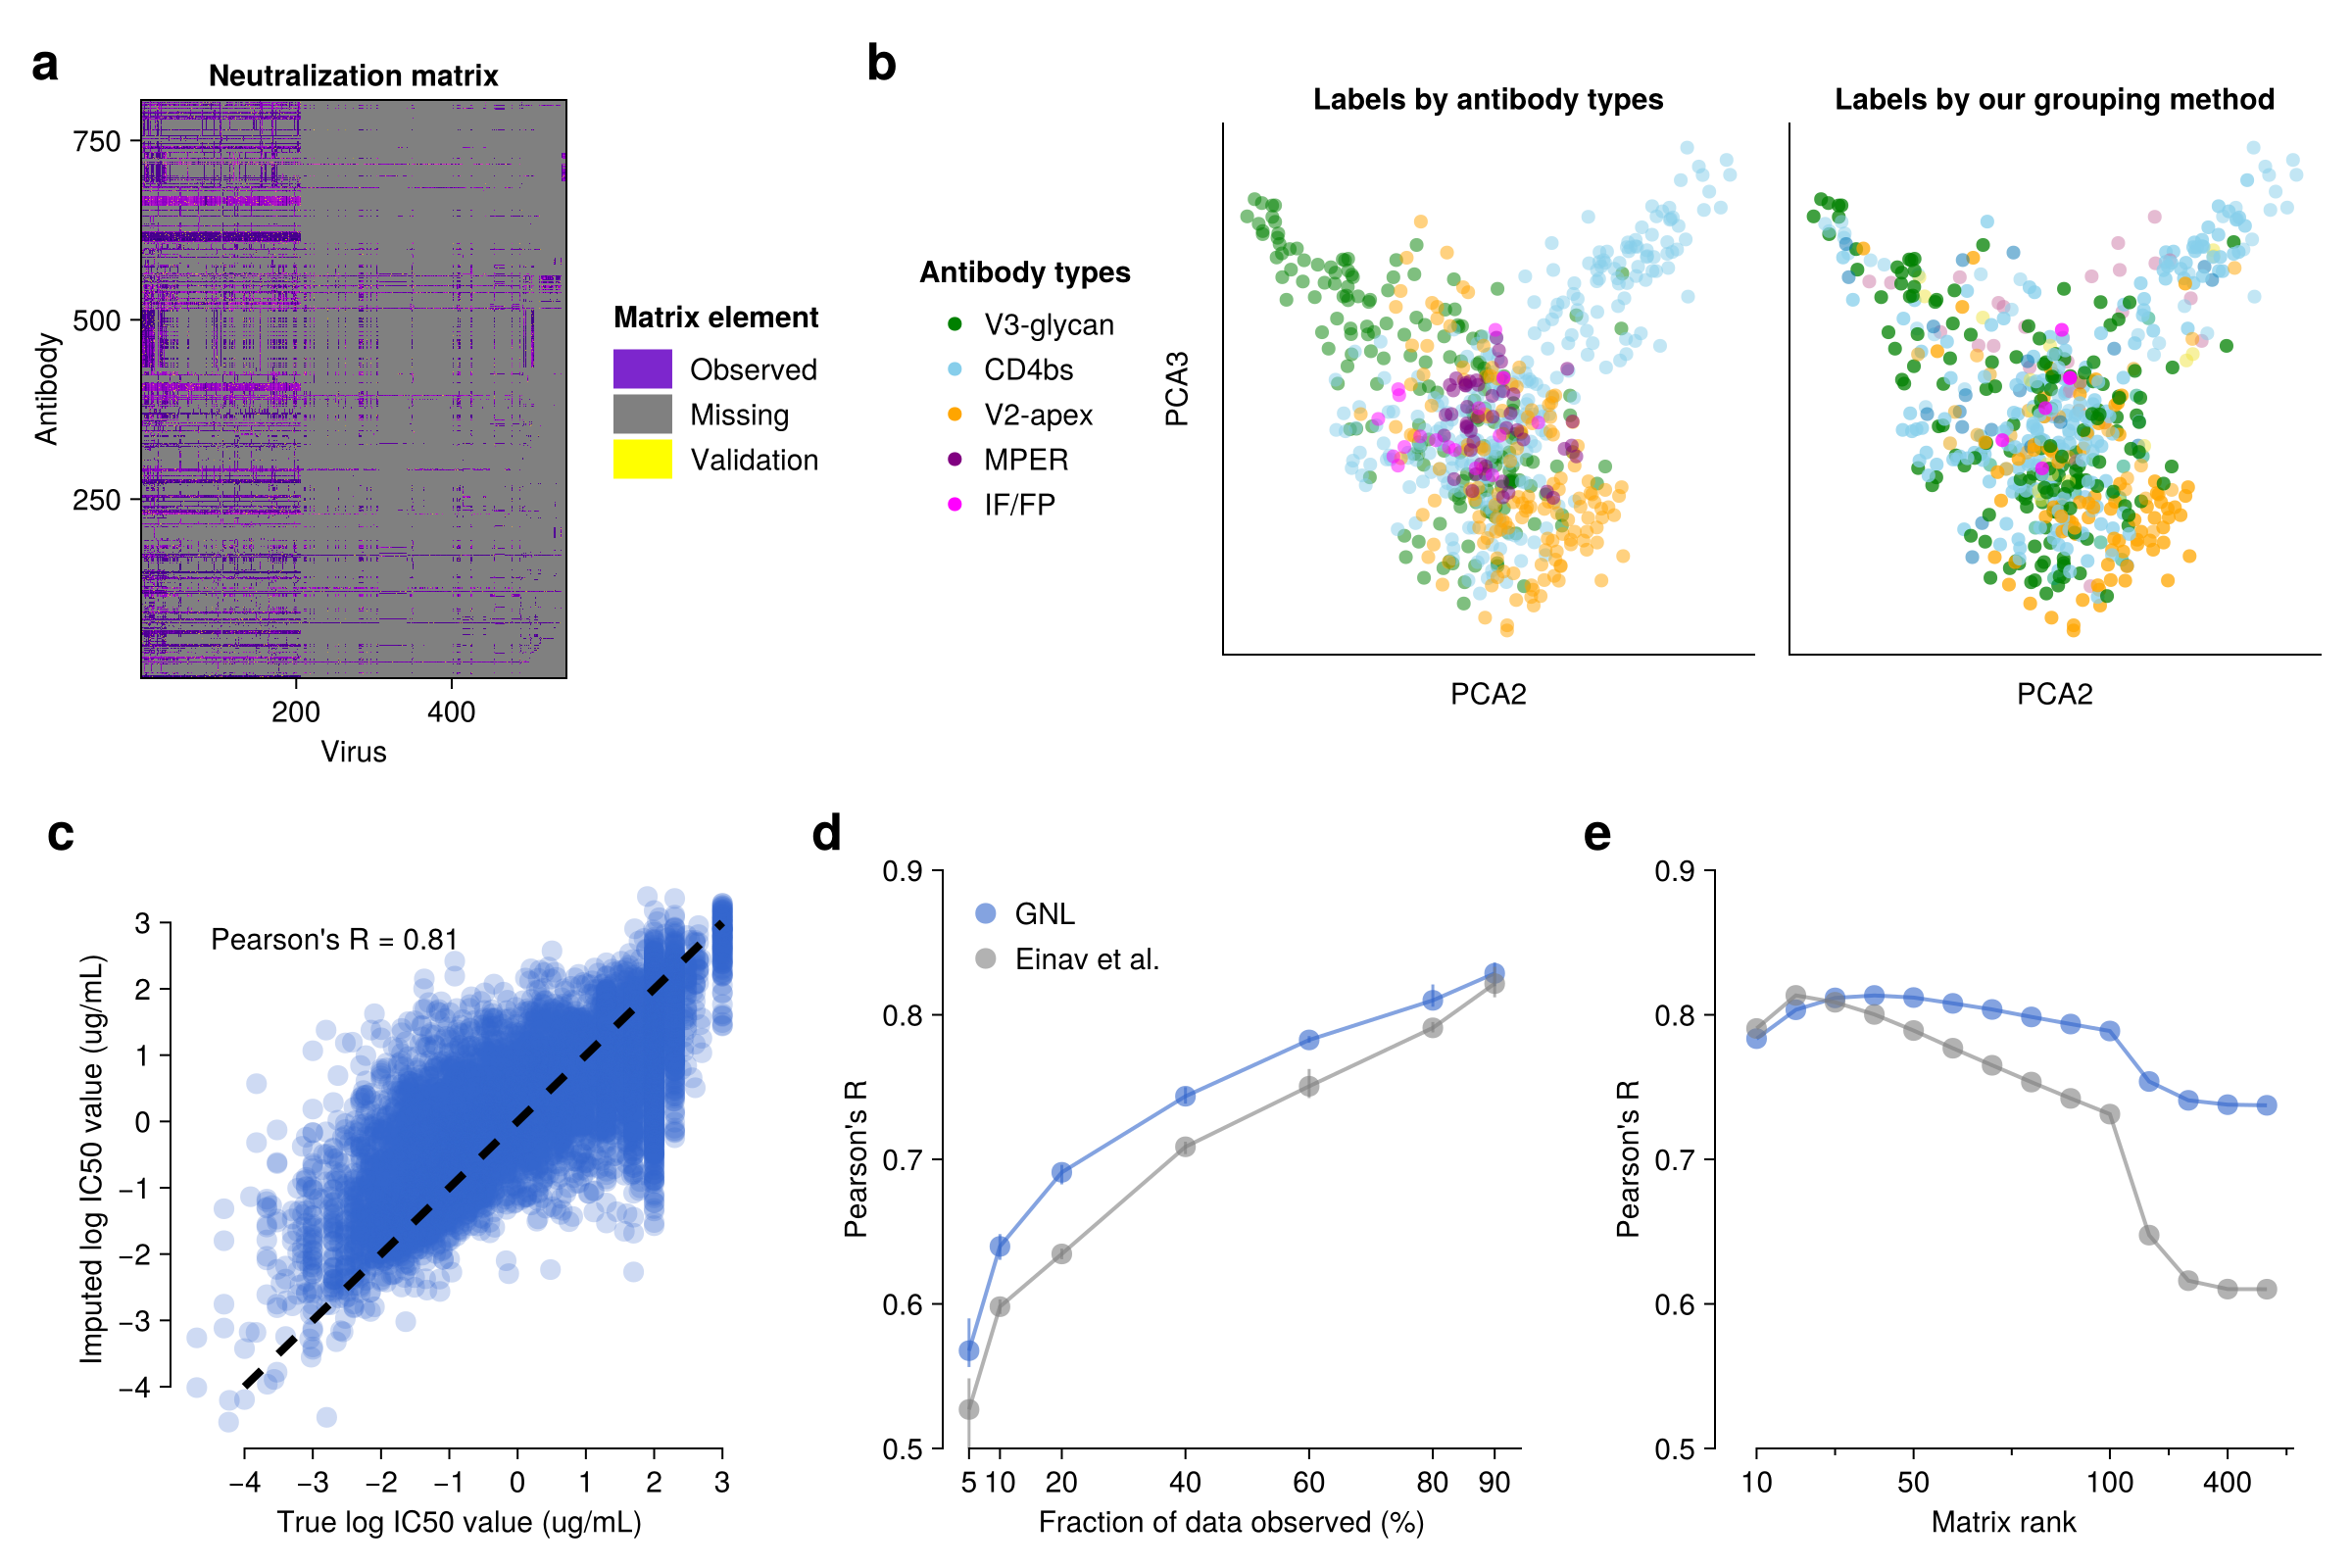

In [606]:
FigW = 1200
FS = scaled_fontsize(FigW; scale_factor=15/FigW)
fig = Figure(fontsize=FS, size = (FigW, Int((8/12)*FigW)))
ga = fig[1, 1] = GridLayout(); gb = fig[1, 2:3] = GridLayout()
gcde = fig[2, 1:3] = GridLayout()
gc = gcde[1, 1] = GridLayout(); gd = gcde[1, 2] = GridLayout(); ge = gcde[1, 3] = GridLayout()
# ------- Fig.2a

dir_data = "../data/processed";
# Fig.1.a
fname_in = @sprintf("%s/IC50_single_w_seq.txt", dir_data)
fig2a_heatmap!(ga, fname_in, FS)

# Fig.1.b
type_of_abs_raw = readdlm(@sprintf("%s/types_of_antibodies_for_low-dim-representation_GK.txt", dir_data))
larger_eigen_modes_raw = readdlm(@sprintf("%s/larger_eigen_mode_GK.txt", dir_data));
color_set_abs_type = ["green", "skyblue", "orange", "purple", "magenta", "gray"] 
name_set_abs_type = ["V3-glycan", "CD4bs", "V2-apex", "MPER", "Interface/FP", "Unclassified"] 
map_abs2color = Dict(zip(name_set_abs_type, color_set_abs_type));
map_color2abs = Dict(zip(color_set_abs_type, name_set_abs_type));
k_max = Int(maximum(type_of_abs_raw[:,4]))
#
fig2b_PCA!(gb, type_of_abs_raw, larger_eigen_modes_raw, 
        color_set_abs_type, map_abs2color, map_color2abs, k_max, FS);

# Fig.1.c
fname_in = @sprintf("%s/scatter_plot_compare_better_true_vs_imputed.csv", dir_data)
fig2c_scatter!(gc, fname_in, FS)

# Fig.1.d
fname_fraction = @sprintf("%s/catnap_fraction_dependency_optimal_random.csv", dir_data)
fig2d_accuracy_vs_dataobserved!(gd, fname_fraction, FS)

# Fig.1.e
fname_rank = @sprintf("%s/catnap_rank_dependency_random.csv", dir_data)
fig2e_accuracy_rank!(ge, fname_rank, FS);


for (label, layout) in zip(["a", "b", "c", "d", "e"], [ga, gb, gc, gd, ge])
    Label(layout[1, 1, TopLeft()], label,
        fontsize = FS_L,
        font = :bold,
        padding = (0, 5, 5, 0),
        halign = :left)
end
fig

#save("../fig/fig2_overall_performance.png", fig)


## Fig.2

V1V2:	Einav=0.33	SLAPNAP=0.53	GNL=0.63
V3:	Einav=0.51	SLAPNAP=0.55	GNL=0.63
CD4BS:	Einav=0.52	SLAPNAP=0.46	GNL=0.58
FP:	Einav=0.32	SLAPNAP=0.55	GNL=0.52
SI:	Einav=0.21	SLAPNAP=0.43	GNL=0.34
MPER:	Einav=0.65	SLAPNAP=0.59	GNL=0.75
mean:  Null=0.46, SLAPNAP=0.51 GNL=0.60


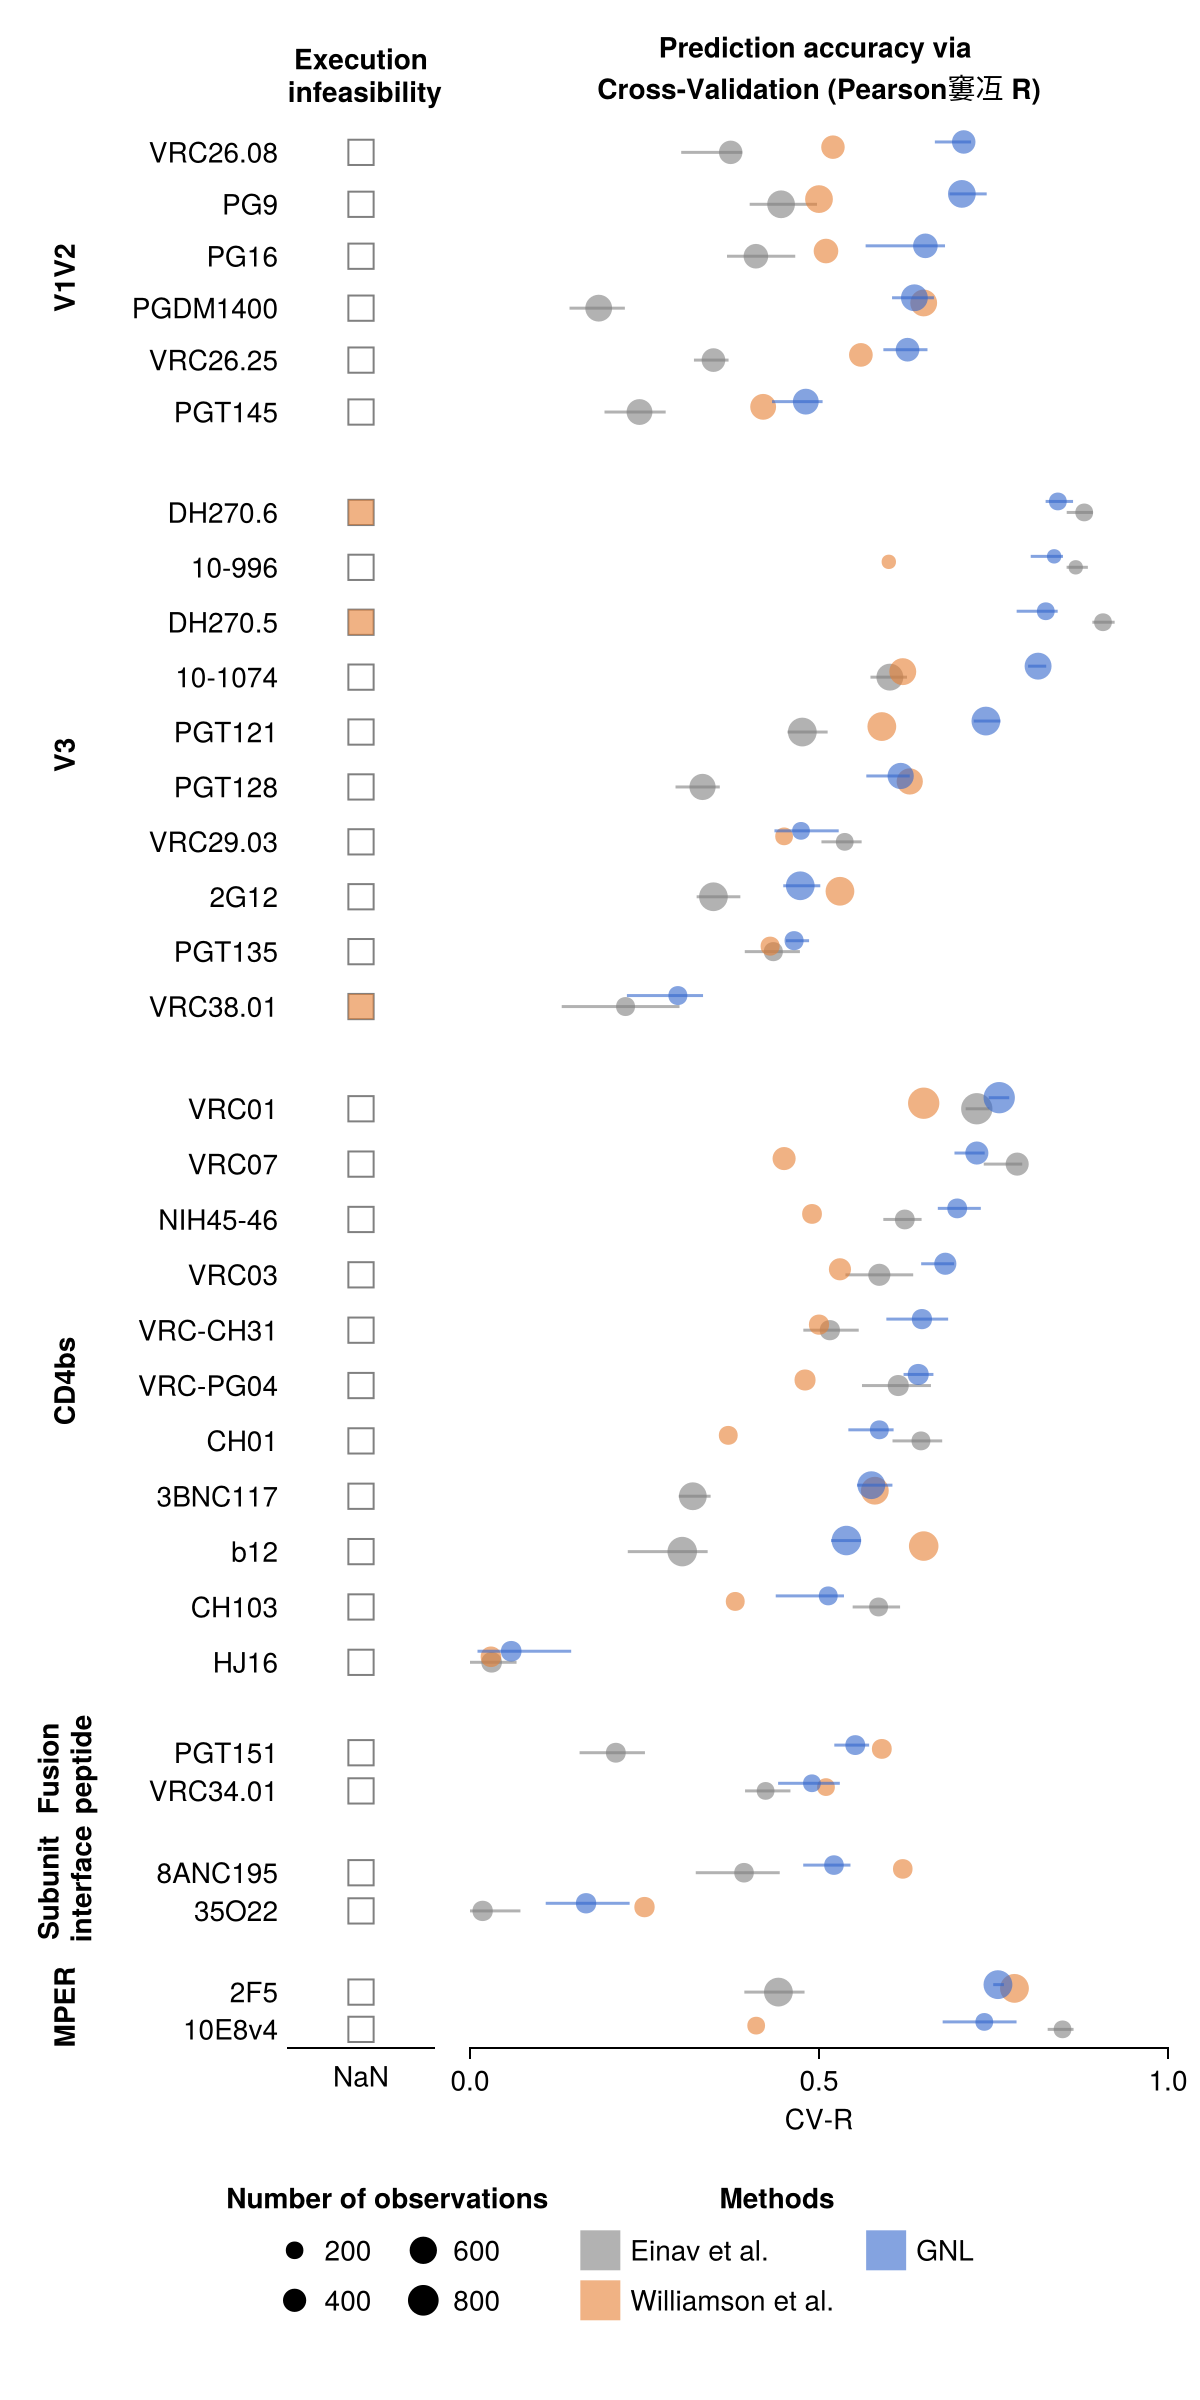

In [607]:
fname_slapap = @sprintf("%s/result_of_SLAPNAP_5-fold_cvtune-true_cvperf-true_v2.csv", dir_data)
fname_gnl = @sprintf("%s/result_of_our-method_5-fold_10itr_v2.csv", dir_data)
fname_abs_count =  @sprintf("%s/abs_names_obs-count_v2.csv", dir_data)
FigW = 600 # this should be used for the total figure size. 
fig = fig3_performance_comparison(fname_slapap, fname_gnl, fname_abs_count, FigW);

fig
#save("../fig/fig3_cross-validation-R.pdf", fig)

## Fig.3

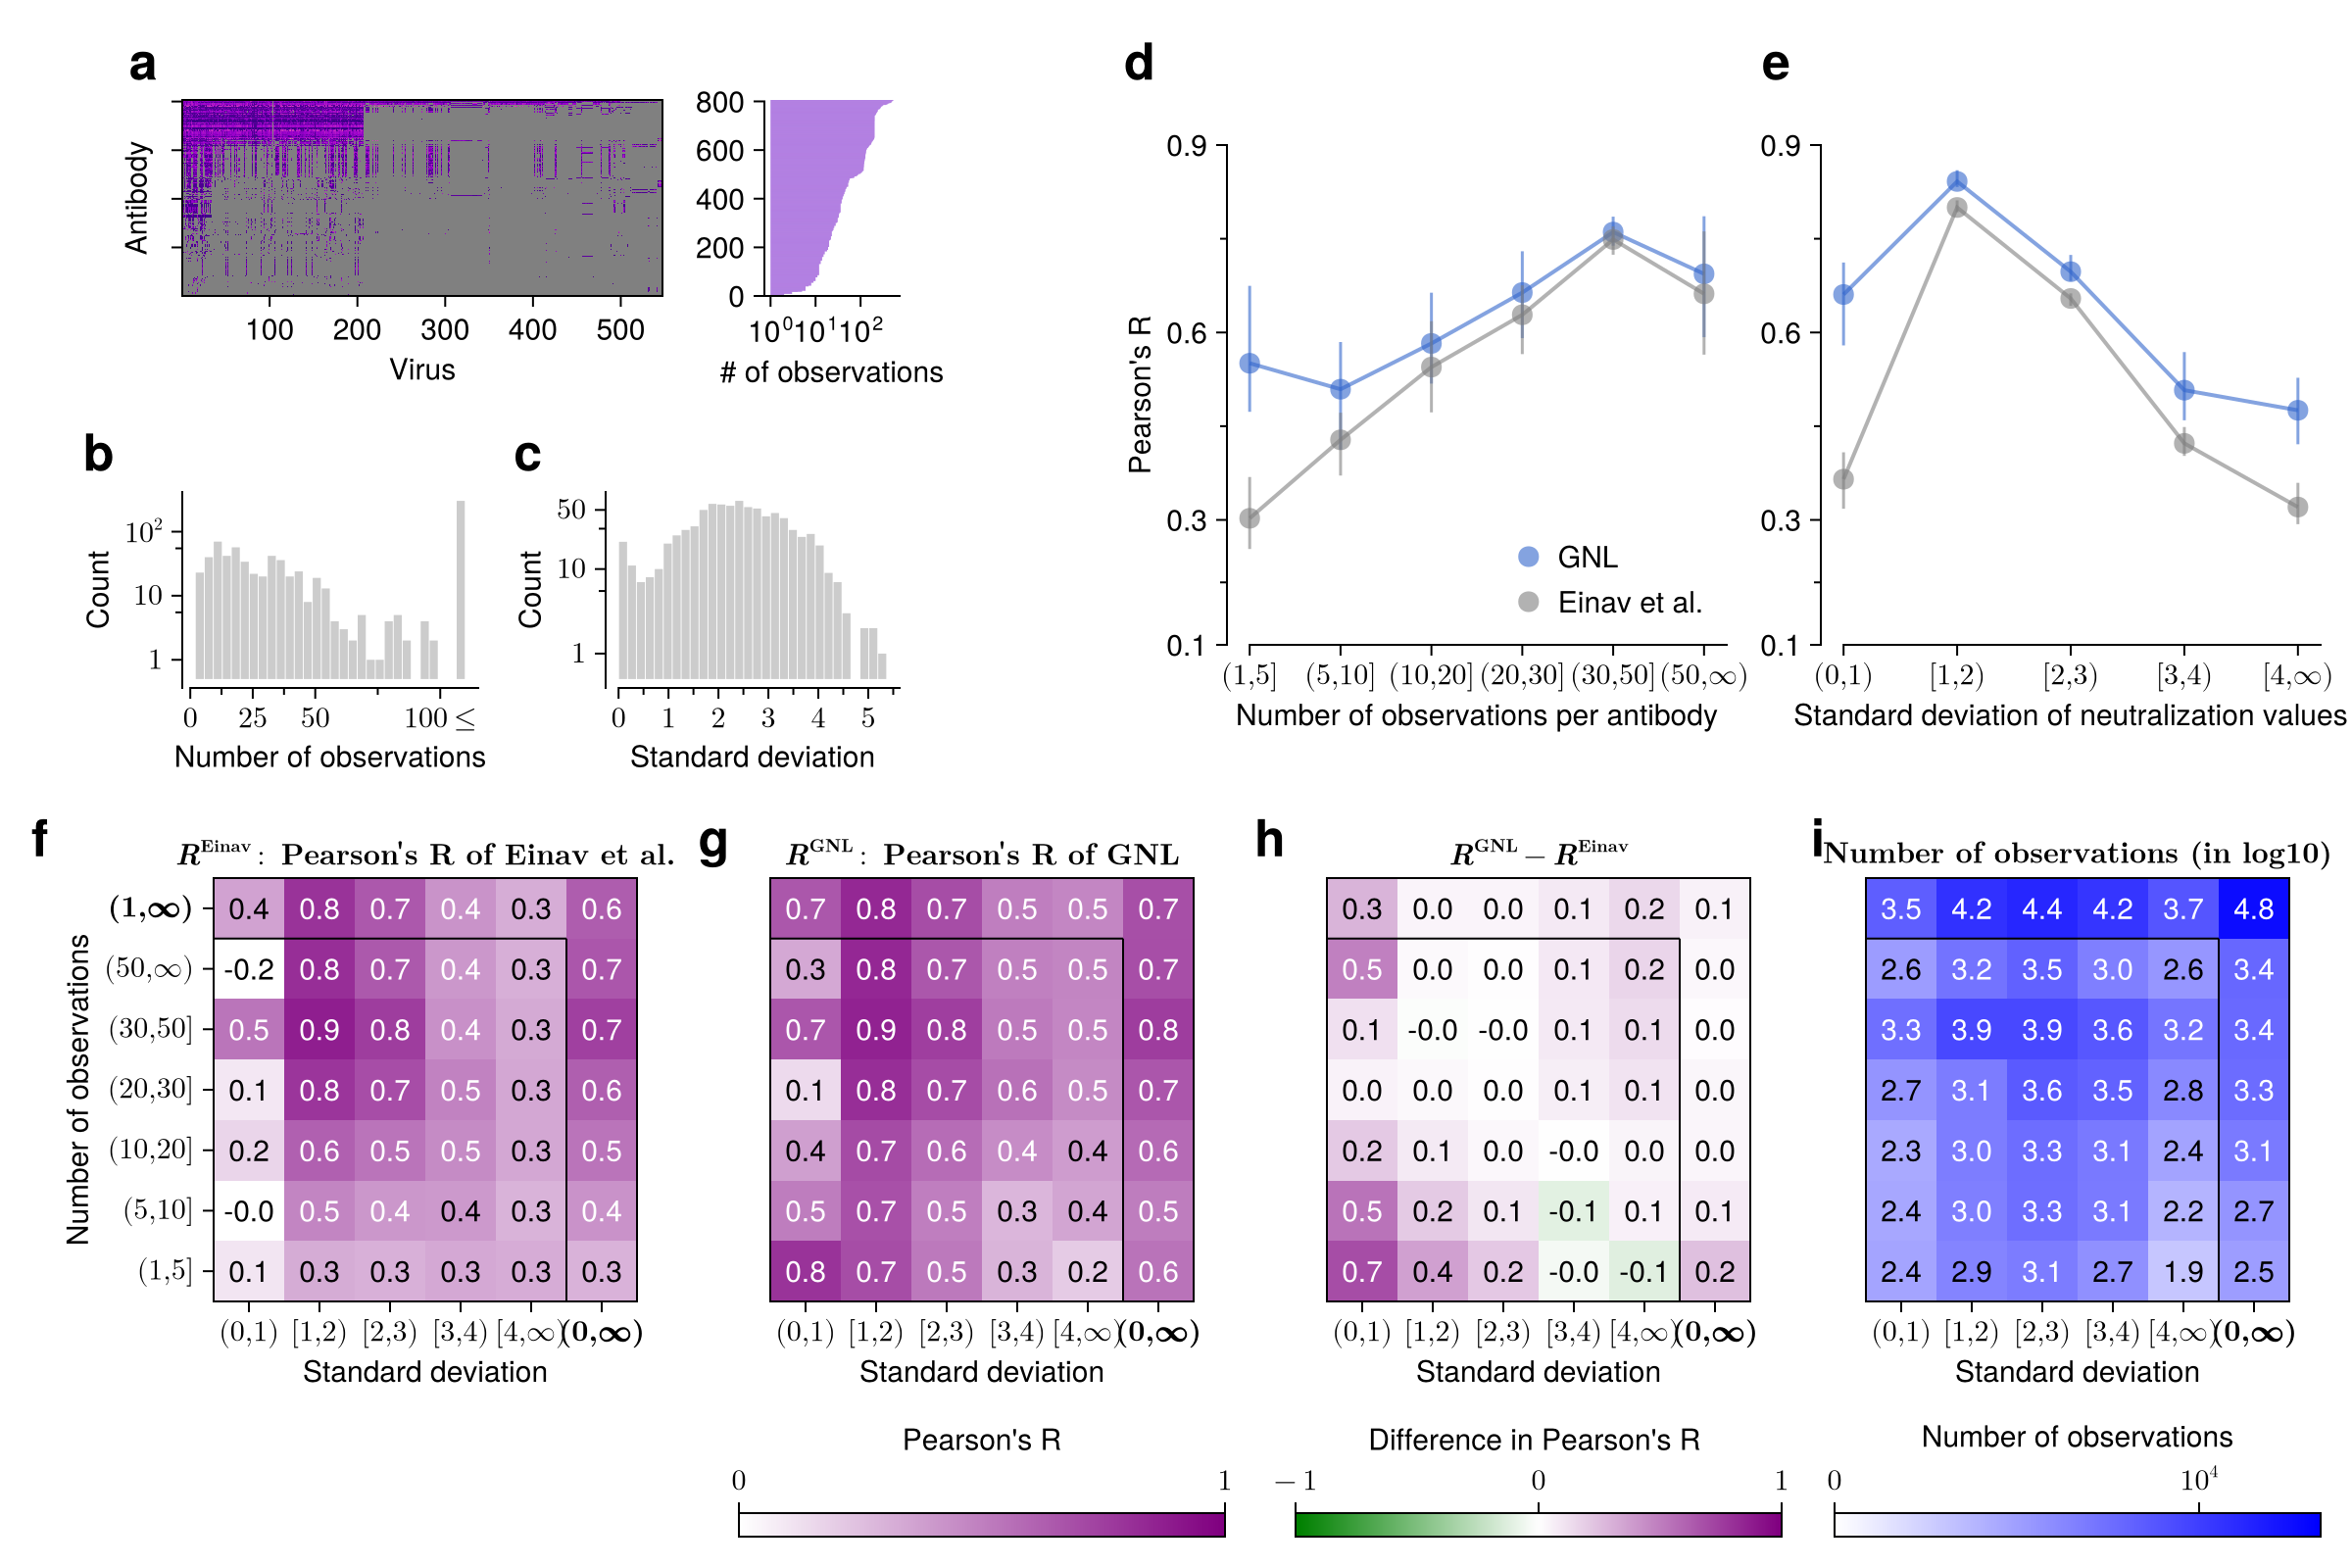

In [608]:
FigW = 1200
FS = scaled_fontsize(FigW; scale_factor=15/FigW)
fig = Figure(#backgroundcolor = RGBf(0.98, 0.98, 0.98), 
    fontsize=FS, 
    size = (FigW, Int((8/12)*FigW)))

ga = fig[1, 1:4] = GridLayout()
gbc = fig[2, 1:4] = GridLayout()
gde = fig[1:2, 6:11]
gfghi = fig[3:5, 1:11] = GridLayout()



# ------- Fig.4a
fname_catnap = @sprintf("%s/IC50_single_w_seq.txt", dir_data)
fig4a_heatmap!(ga, fname_catnap)

# ------- Fig.4bc
fname_observed_value = @sprintf("%s/num_of_observations_each_antibody.txt", dir_data)
fname_std_per_abs = @sprintf("%s/std_of_each_antibody.txt", dir_data)
fig4bc_bar!(gbc, fname_observed_value, fname_std_per_abs)

# ------- Fig.4de
fname_accu_basic = @sprintf("%s/summary_accuracy_basic_random_witholding.csv", dir_data)
fname_accu_abundance = @sprintf("%s/summary_accuracy_data-aboundance_dependent_witholding.csv", dir_data)
std_labels = [L"(0,1)", L"[1,2)", L"[2,3)", L"[3,4)", L"[4,∞)", L"\textbf{(0,∞)}"]
labels_data_abundance = [L"(1,5]", L"(5,10]", L"(10,20]", L"(20,30]", L"(30,50]", L"(50,∞)", L"\textbf{(1,∞)}"]; 

(aboundance_set, std_bins_set, mat_accuracy_basic, mat_count_basic, 
    mat_accuracy_aboundance, mat_count_aboundance) = format_accuracy_std_abundance(fname_accu_basic, fname_accu_abundance)

fig4de_accuracy!(gde, mat_accuracy_aboundance, labels_data_abundance, std_bins_set)
#colgap!(gde, 10)
# ------- Fig.4f-i
fig4fghi_heatmap!(gfghi, std_labels, labels_data_abundance, mat_count_aboundance, mat_accuracy_aboundance)

Label(ga[1, 1, TopLeft()], "a", fontsize = FS_L,
        font = :bold, padding = (0, 5, 5, 0), halign = :left)
fig

#save("../fig/fig4_abundance_std_dependency.png", fig)

## Fig.4

In [609]:
fname_IC50_individual = @sprintf("%s/IC50_single_w_seq_ch505.txt", dir_data)
fname_time = @sprintf("%s/time_in_process_ch505.txt", dir_data)
fname_virus_name = @sprintf("%s/virus_unique_filtered_ch505.txt", dir_data)
fname_pearson_before = @sprintf("%s/pearson_observed_before_210weeks.csv", dir_data)
fname_pearson_after =  @sprintf("%s/pearson_observed_until_140weeks.csv", dir_data)
IC50_ch505 = readdlm(fname_IC50_individual);
time_in_process = readdlm(fname_time);
virus_name_ch505 = readdlm(fname_virus_name ); 
Pearson_observed_before = CSV.read(fname_pearson_before, DataFrame);
Pearson_observed_after = CSV.read(fname_pearson_after, DataFrame);

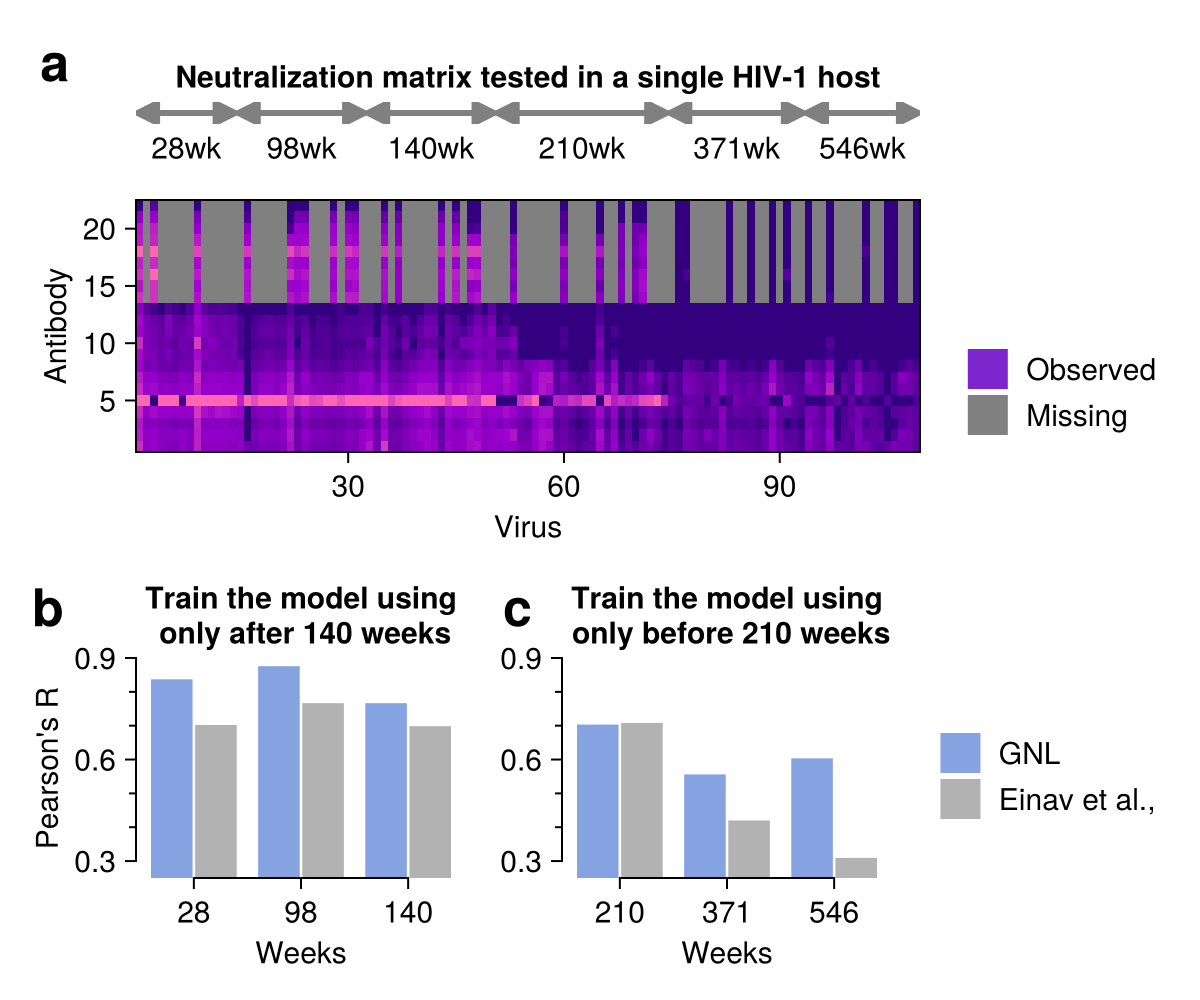

In [610]:
FigW = 600
FS = scaled_fontsize(FigW; scale_factor=15/FigW)
fig = Figure(#backgroundcolor = RGBf(0.98, 0.98, 0.98), 
    fontsize=FS, size = (FigW, Int((10/12)*FigW)))

ga = fig[1:6, 1] = GridLayout()
gb = fig[7:10, 1] = GridLayout();

fig5a_hist!(ga, time_in_process, IC50_ch505, virus_name_ch505)
fig5b_bar!(gb, Pearson_observed_before, Pearson_observed_after)

Label(ga[1, 1, TopLeft()], "a", fontsize = FS_L,
        font = :bold, padding = (0, 5, 5, 0), halign = :left)

fig

#save("../fig/fig5_individual_host_befor_after_prediction.png", fig)

## Fig.5

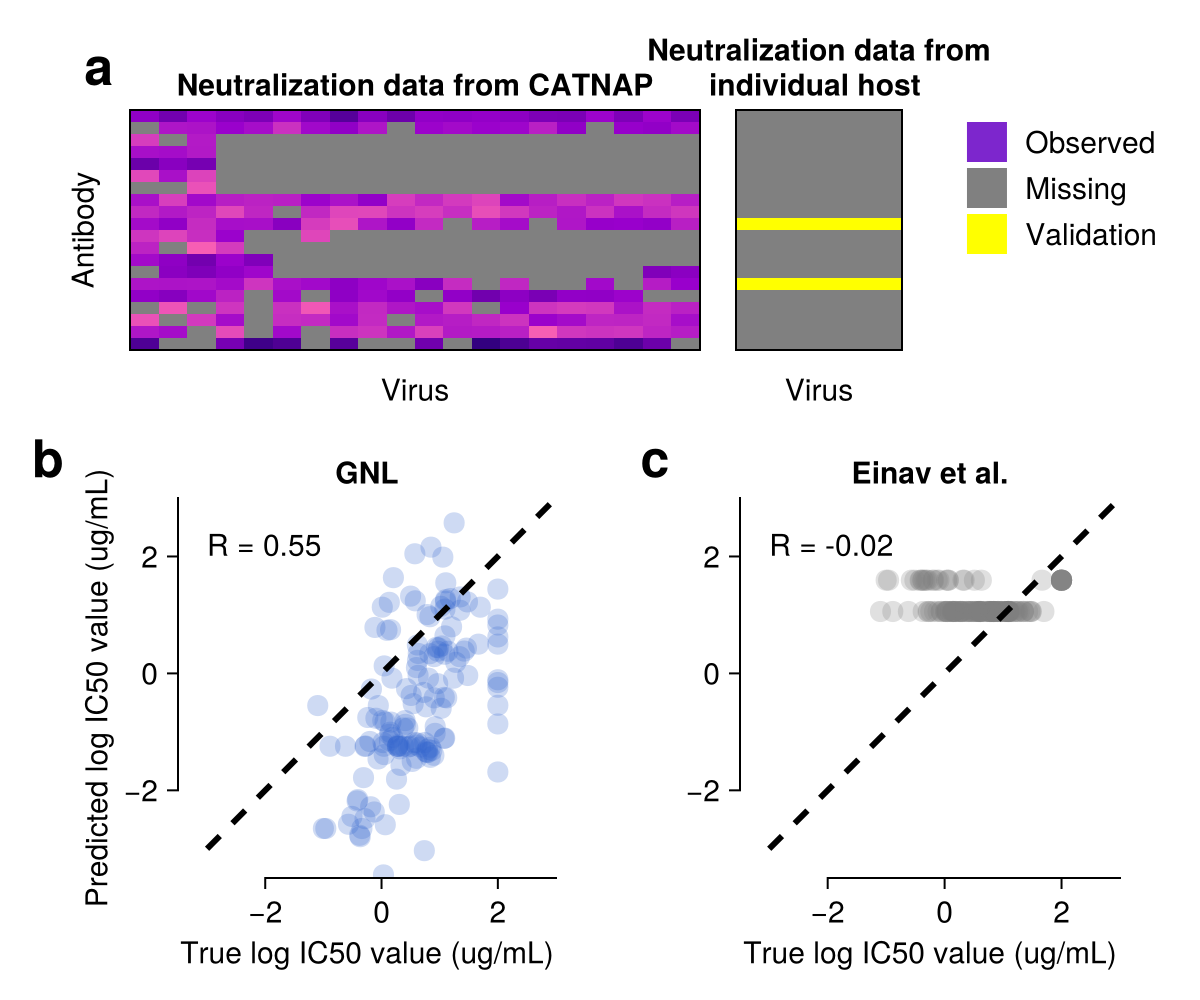

In [618]:
fname_NM = @sprintf("%s/imputed_CHC505s_ic50_values_using_only_CATNAP_NMsvd.csv", dir_data)
fname_GLR = @sprintf("%s/imputed_CHC505s_ic50_values_using_only_CATNAP_LRsvd.csv", dir_data)

FigW = 600
FS = scaled_fontsize(FigW; scale_factor=15/FigW)
fig = Figure(#backgroundcolor = RGBf(0.98, 0.98, 0.98), 
    fontsize=FS, size = (FigW, Int((10/12)*FigW)))

ga = fig[1:2, 1] = GridLayout()
gb = fig[3:5, 1] = GridLayout();

Label(ga[1, 1, TopLeft()], "a", fontsize = FS_L,
        font = :bold, padding = (0, 5, 5, 0), halign = :left)

fig6a_heatmap!(ga)
fig6b_scatter!(gb, fname_NM, fname_GLR)

fig

#save("../fig/fig6_individual_host_prediction_leveraging_catnap.png", fig)

# Supplementary figures 

## Fig. S1

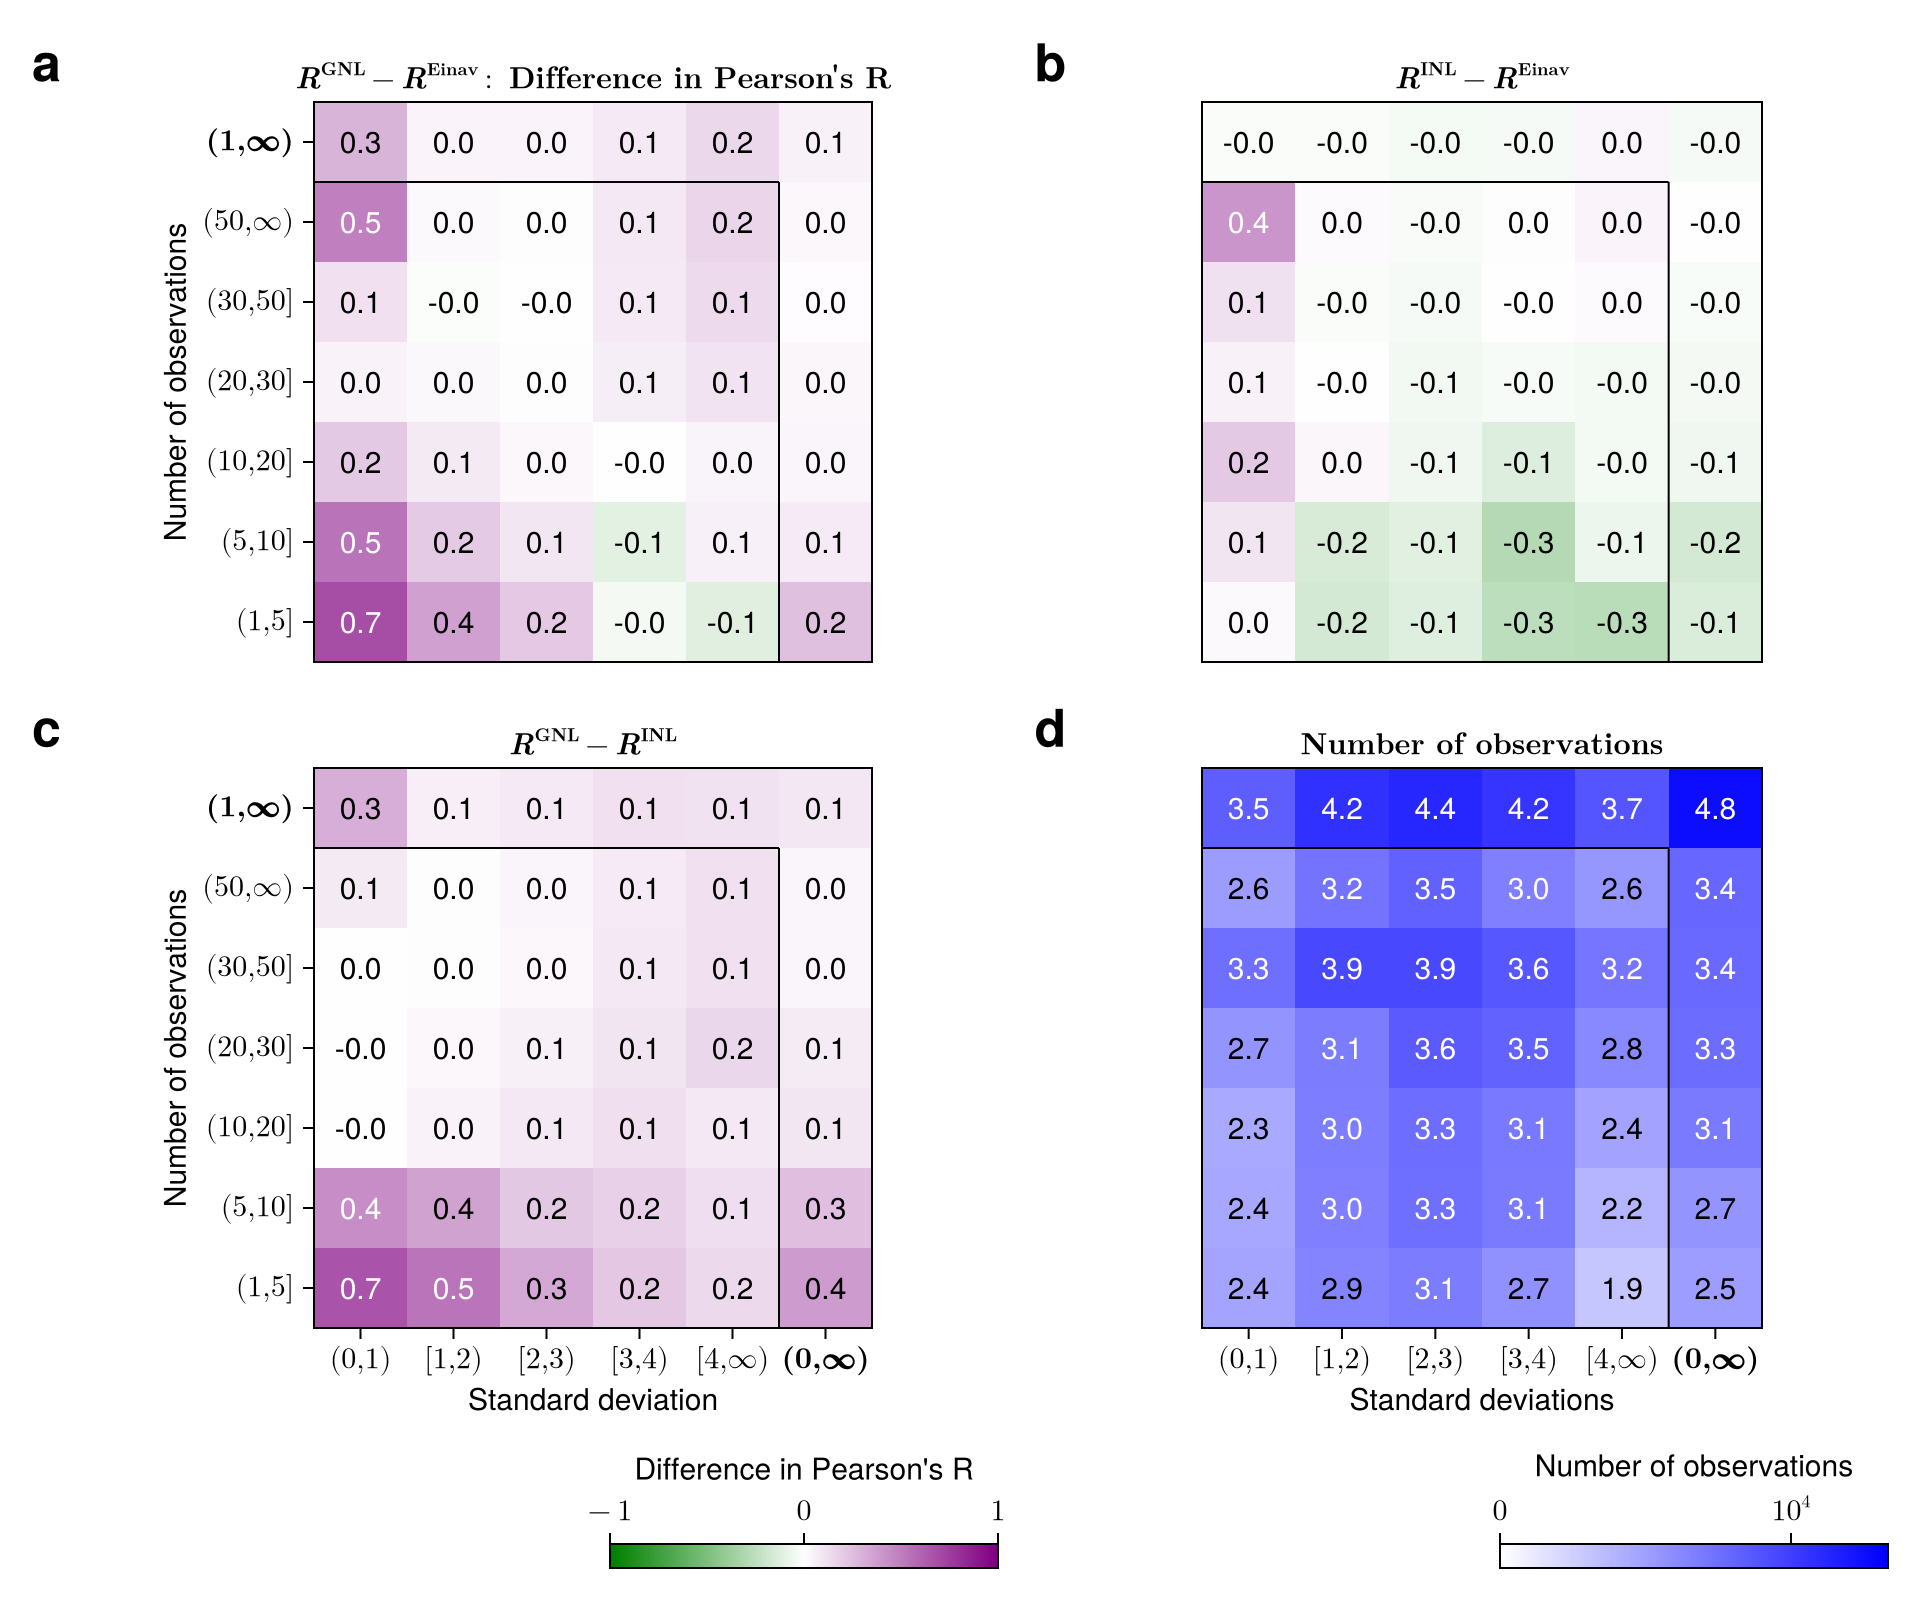

In [612]:
FigW = 1200 * 0.8
FS = scaled_fontsize(FigW; scale_factor=15/FigW)
fig = Figure(#backgroundcolor = RGBf(0.98, 0.98, 0.98), 
    fontsize=FS, size = (FigW, Int((10/12)*FigW)))

fig1S_abcd_heatmap!(fig, std_labels, labels_data_abundance, mat_count_aboundance, mat_accuracy_aboundance)

fig

#save("../fig/fig1S_heatmap_difference_in_R-values.png", fig)

## Fig. S2

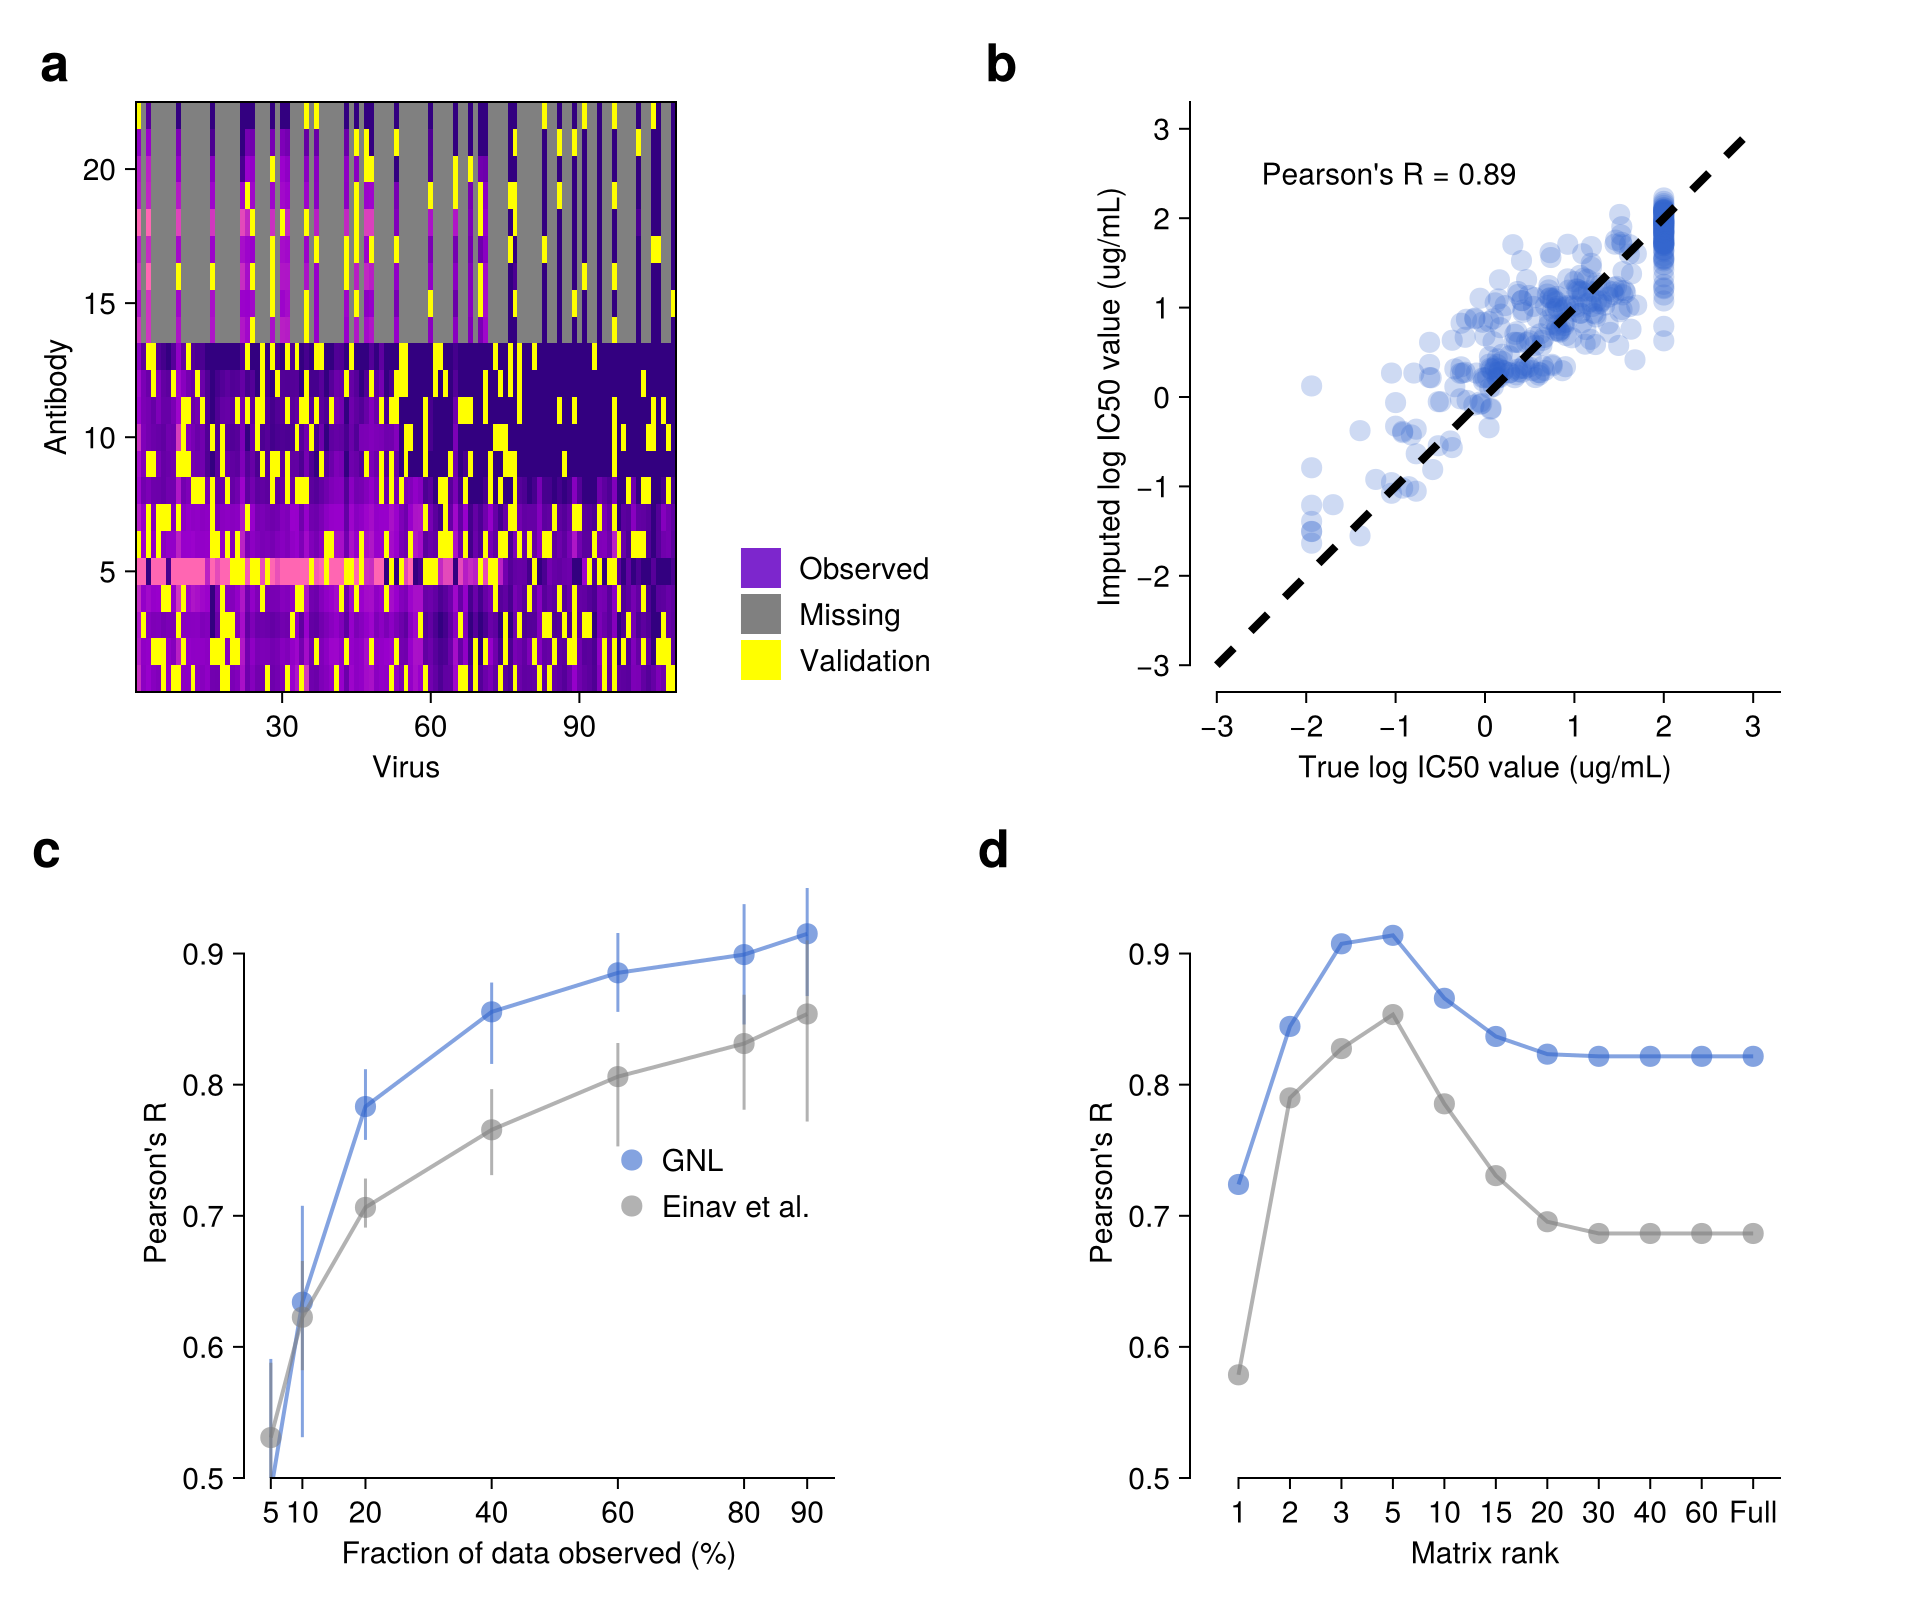

In [613]:
FigW = 1200 * 0.8
FS = scaled_fontsize(FigW; scale_factor=15/FigW)
fig = Figure(#backgroundcolor = RGBf(0.98, 0.98, 0.98), 
    fontsize=FS, size = (FigW, Int((10/12)*FigW)))


ga = fig[1, 1] = GridLayout(); gb = fig[1, 2] = GridLayout();
gc = fig[2, 1] = GridLayout(); gd = fig[2, 2] = GridLayout();

fig2Sa_heatmap!(ga, time_in_process, IC50_ch505, virus_name_ch505)

fname_compare = @sprintf("%s/compare_log_IC50_Null_GLR_ch505.csv", dir_data)
fig2Sb_scatter!(gb, fname_compare)

fname_fraction = @sprintf("%s/ch505_fraction_dependency_optimal_random.csv", dir_data)
fname_rank = @sprintf("%s/ch505_rank_dependency_random.csv", dir_data)

fig2Sc_accuracy_vs_dataobserved!(gc, fname_fraction, FS)
fig2Sd_accuracy_rank!(gd, fname_rank, FS)

for (label, layout) in zip(["a", "b", "c", "d"], [ga, gb, gc, gd])
    Label(layout[1, 1, TopLeft()], label,
        fontsize = FS_L,
        font = :bold,
        padding = (0, 5, 5, 0),
        halign = :left)
end

fig
#save("../fig/fig2S_overall_performance_individual_host.png", fig)

## Fig. S3

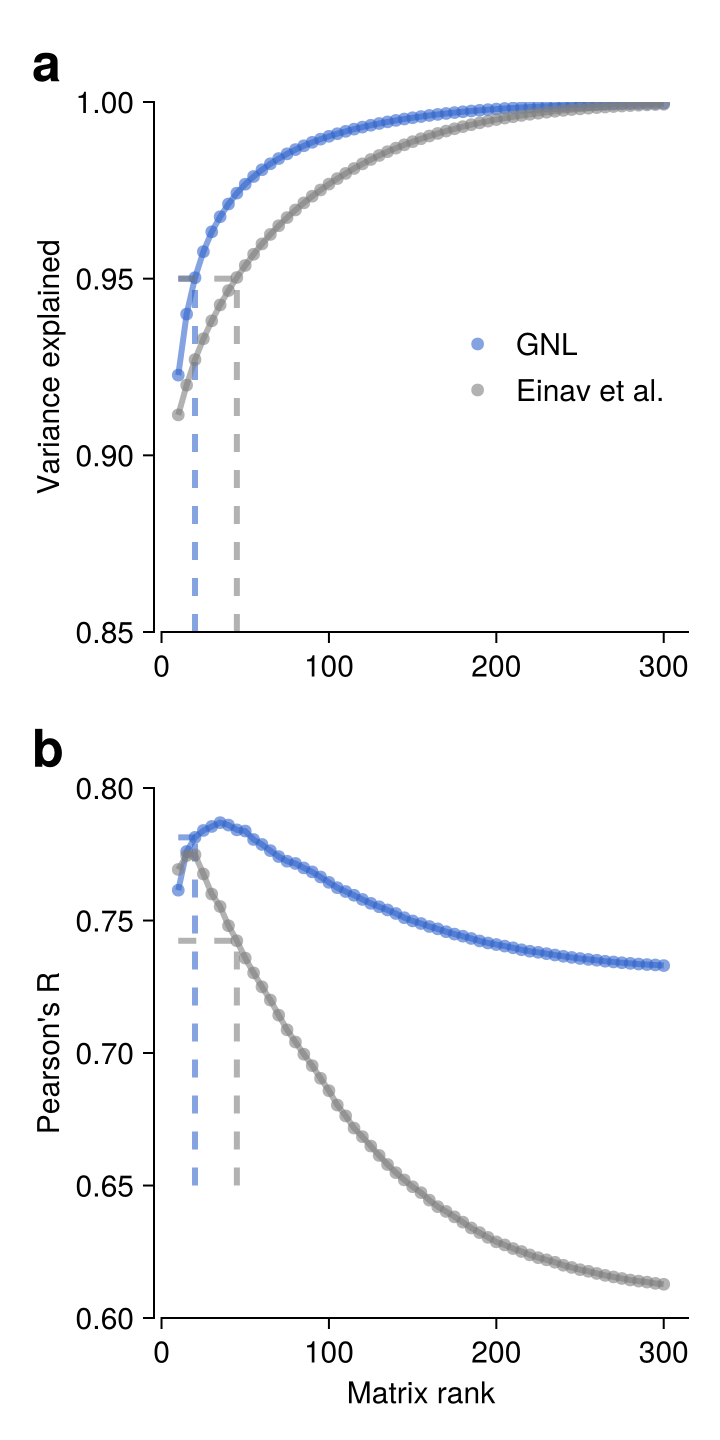

In [614]:
fname_eigen_R_rank = @sprintf("%s/rank_dependency_on_eigen_R_fraction-0.4_v2.csv", dir_data)

FigW = 1200 * 0.3
FS = scaled_fontsize(FigW; scale_factor=15/FigW)
fig = Figure(#backgroundcolor = RGBf(0.98, 0.98, 0.98), 
    fontsize=FS, size = (FigW, Int(2*FigW)))

fig3S_marix_rank_dependency!(fig, fname_eigen_R_rank)

fig

#save("../fig/fig3S_matrix_rank_dependency.pdf", fig)

## Fig. S4

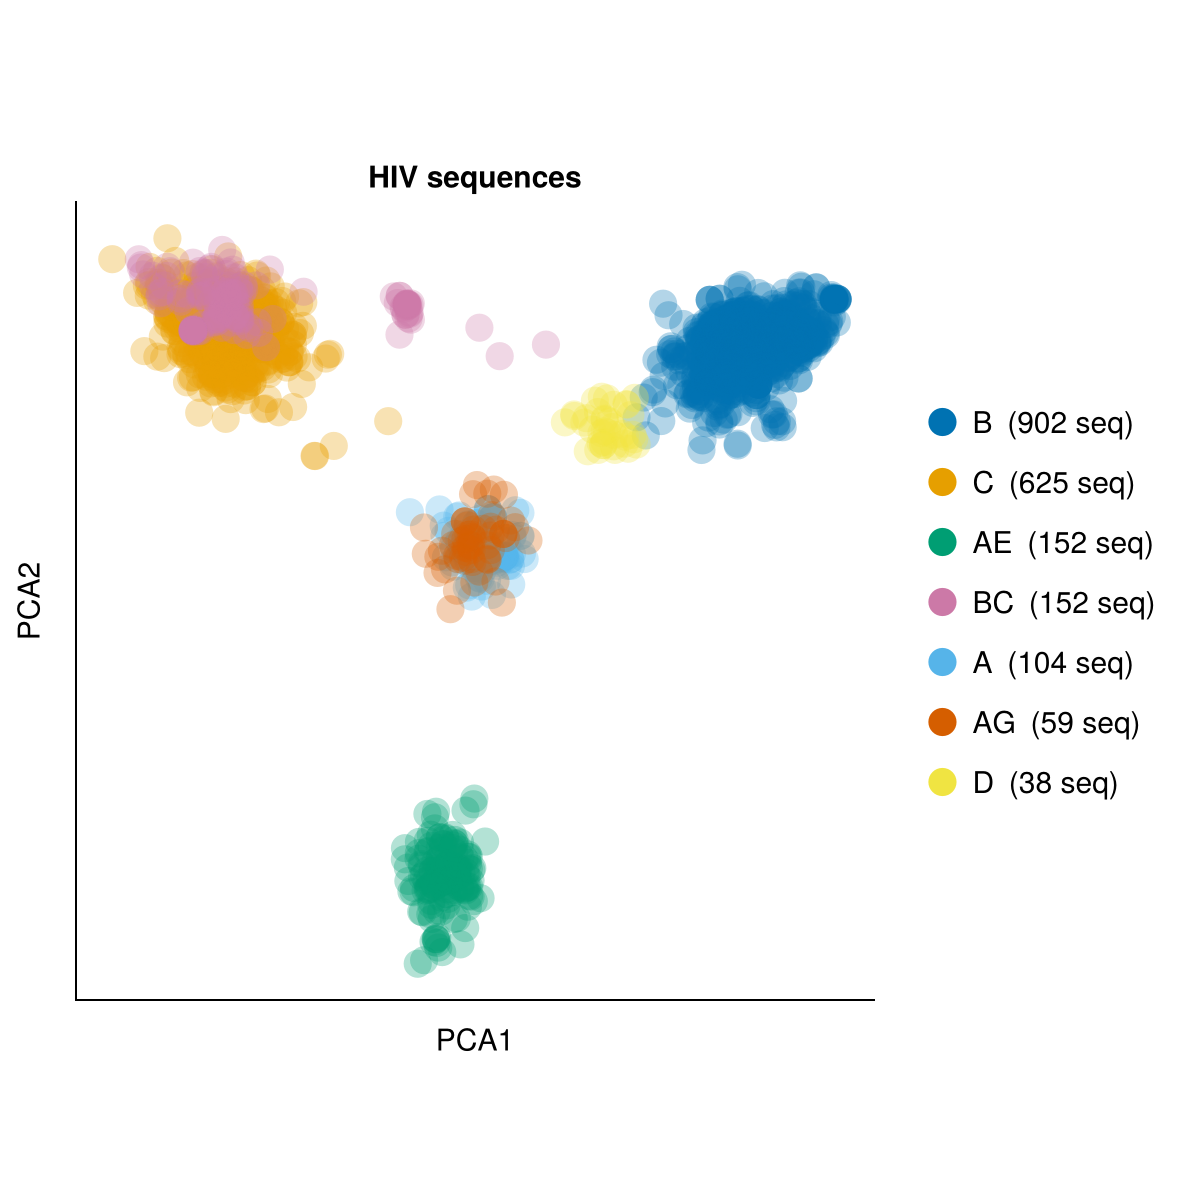

In [615]:
fname_subtype = @sprintf("%s/subtype_filtered.txt", dir_data)
fname_pca_space = @sprintf("%s/pca_space.txt", dir_data)
FigW = 600
fig = fig4S_viral_seq_on_PCA(fname_subtype, fname_pca_space, FigW)

fig

#save("../fig/fig4S_viral_seq_on_PCA.pdf", fig)

## Fig. S1. 

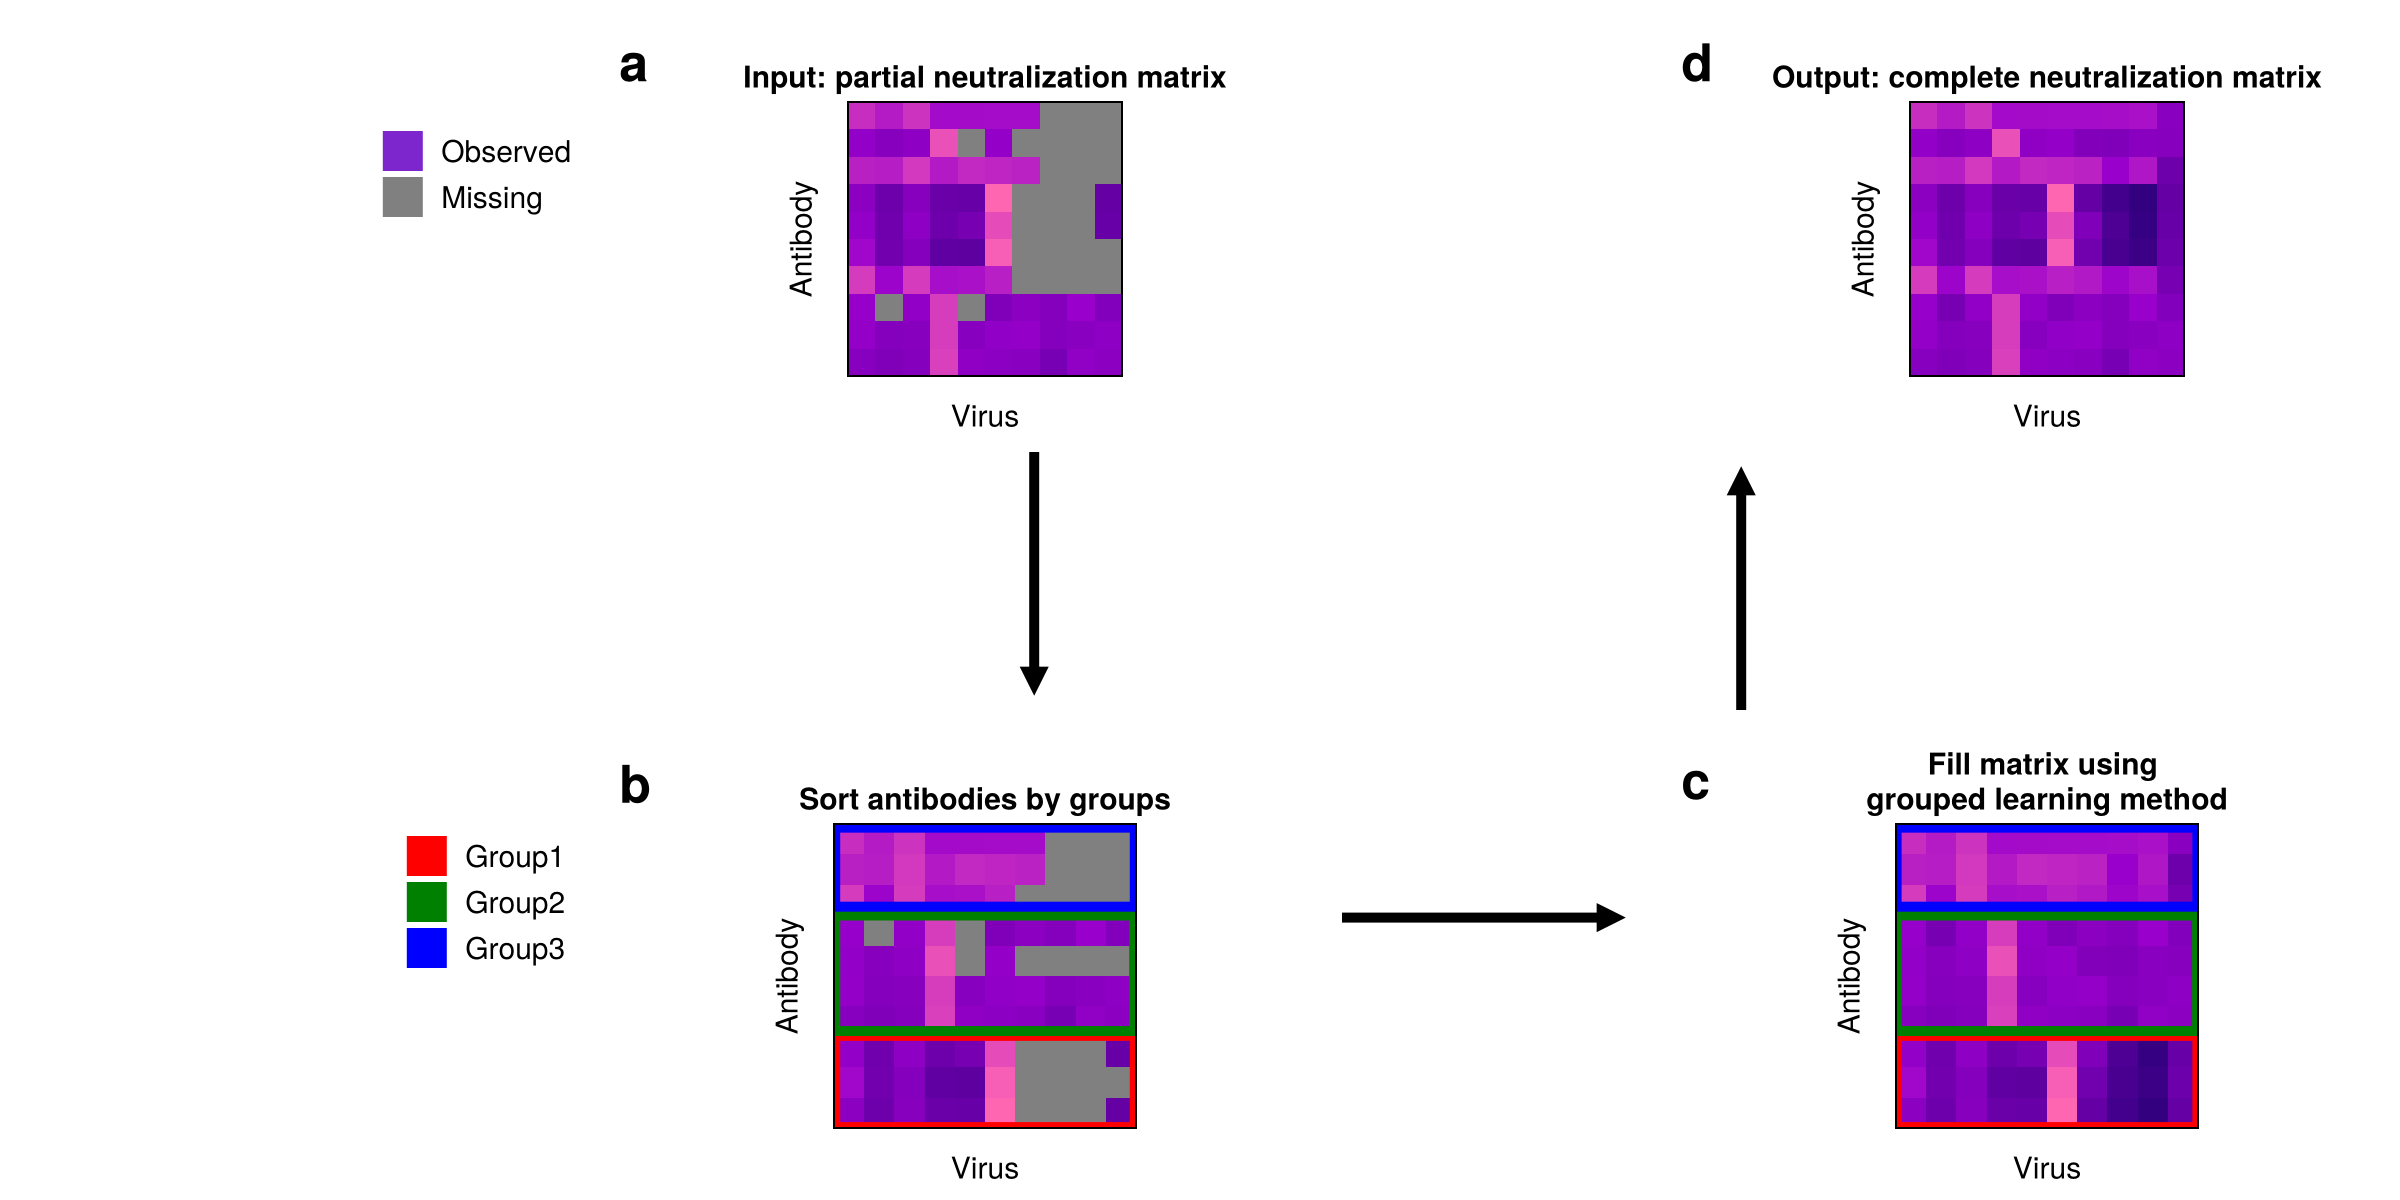

In [616]:

FigW = 1200 
FS = scaled_fontsize(FigW; scale_factor=15/FigW)
fig = Figure(#backgroundcolor = RGBf(0.98, 0.98, 0.98), 
    fontsize=FS, size = (FigW, Int(0.5*FigW)))

fig_S1_process_map!(fig)
fig
#save("../fig/fig1S_process_map.png", fig)